# PMOIRED model syntax with illustration

`PMOIRED` uses Python dictionnaries `{key:value, ...}` where `key` can only be stringes and `value` can be either a number, or a string. `PMOIRED` guesses what the model is solely based on the keys of the dictionnary. This notebook showcases the various basic models, as well how to combine them. 

In [1]:
try:
    # -- jupyter lab
    %matplotlib widget
except:
    # -- jupyter notebook
    %matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
try:
    # -- global installation
    import pmoired
    print('global')
except:
    # -- local installation
    import sys
    sys.path = ['../pmoired'] + sys.path
    import __init__ as pmoired
    print('local')
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# -- dummy wavelength vectorfor display
WL = np.linspace(1,3,10)
oi = pmoired.OI()

[P]arametric [M]odeling of [O]ptical [I]nte[r]ferom[e]tric [D]ata https://github.com/amerand/PMOIRED
checking for newer version... Up to date [you have 20220811]
local


## Basic models

The basic buiding blocks are as followed. All dimensions are in milli-arcseconds:
- uniform disk {`ud`}
- disk with arbitrary profile {`diam`, `profile`}
- ring with arbitrary profile {`diamin`, `diamout`, `profile`} or {`diam`, `thick`, `profile`}. In the later case, `diam` is the outer diameter, and `thick` is the thickness from 0 (infinitely thin) and 1 (filled disk)
- Gaussian {`fwhm`}
- Crescent {`crin`, `crout`, `croff`, `crprojang`} for the inner and outer diameter (mas), the offset of inner to outer limits (0..1) and the projection angle of the thinest part (degrees, 0==N, 90==E)
- if none of the above, the component is a fully resolved (i.e. 0 visibility at all baselines)

`profile` is a string which defines the radial profile as function of `$R` (radius, in mas), `$D` (diameter in mas) or `$MU`=$\sqrt{1-r^2/r_{max}^2}$. Note that the absolute value of `profile` does not matter: the flux of the model if defined by `f` or `spectrum`

In addition, you can define:
- `f` as the flux of the component
- `x` and `y` the positions (`x` towards East in mas, `y` towards North in mas)
- `incl`, `projang` the inclination and projection angle in degrees. The projection angle is defines a 0==N, 90==E. The image will compressed by a factor cosine(inclination) in the direction perpendicular to projection angle 
- pairs of `az amp`i, `az projang`i for harmonic azimuthal variations or order i (not for Gaussians). if overall `projang` is defined, `az projang`i are defined with respect to the global projection angle. 


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


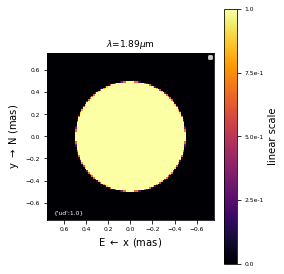

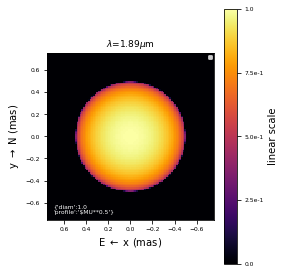

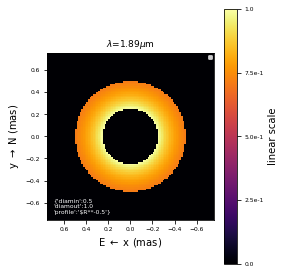

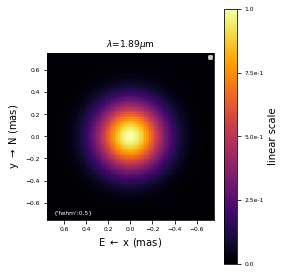

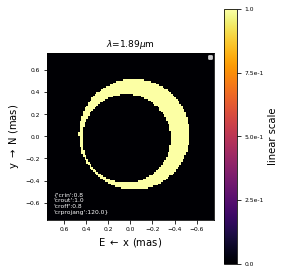

In [2]:
for model in [{'ud':1}, 
              {'diam':1, 'profile':'$MU**0.5'}, 
              {'diamin':0.5, 'diamout':1, 'profile':'$R**-0.5'},
              {'fwhm':0.5}, 
              {'crin':0.8, 'crout':1, 'croff':0.8, 'crprojang':120}
             ]:
    # -- show just the image: Field of view "imFov" has to be defined
    oi.showModel(model, WL=WL, imFov=1.5, showSED=False)
    # -- optional: overlay model dict on the plot
    plt.text(0.7, -0.7, '{'+'\n'.join(["'%s':'%s'"%(k, model[k].replace('$', '\$')) if type(model[k])==str else "'%s':%.1f"%(k, model[k]) for k in model])+'}', 
             color='w', in_layout=True, fontsize=6, ha='left')

## A bit more complicated model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.7, -0.7, "{'diamin':0.5\n'diamout':1.0\n'profile':'\\$R**-2'\n'az amp1':0.8\n'az projang1':60.0\n'projang':45.0\n'incl':-30.0\n'x':-0.2\n'y':0.1}")

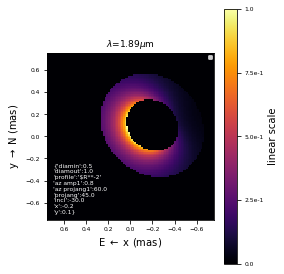

In [3]:
model = {'diamin':0.5, 'diamout':1, 'profile':'$R**-2', 'az amp1':0.8, 'az projang1':60, 'projang':45, 'incl':-30, 'x':-0.2, 'y':0.1}

# -- show just the image: Field of view "imFov" has to be defined
oi.showModel(model, WL=WL, imFov=1.5, showSED=False)
# -- optional: overlay model dict on the plot
plt.text(0.7, -0.7, '{'+'\n'.join(["'%s':'%s'"%(k, model[k].replace('$', '\$')) if type(model[k])==str else "'%s':%.1f"%(k, model[k]) for k in model])+'}', 
         color='w', in_layout=True, fontsize=6, ha='left')

## Combining components

models can be combined using a single dictionary, where keys are `componenent,parameter`. The fluxes and spectra are total, and the `profile` do not change the absolute surface brightness of the component. Any flux in  `PMOIRED` is the total flux of a component, not its surface brightness. 

The total flux of each component is by default equal to 1. Unless you fit also the SED or the normalised flux, only relative fluxes are important (in this case, one should always set at least one flux not fitted). The key `f` define the total flux (that is an achromatic flux spectral density). `spectum` allows to define arbitray spectra as string, using the special string `$WL` to refere to the wavelength in microns. 

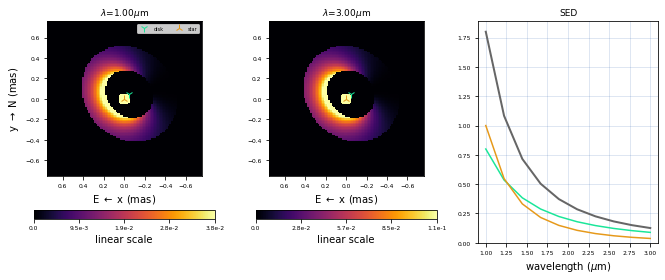

In [4]:
model = {'disk,diamin':0.5, 
         'disk,diamout':1, 
         'disk,profile':'$R**-2', 
         'disk,az amp1':1, 
         'disk,az projang1':60, 
         'disk,projang':45, 
         'disk,incl':-30, 
         'disk,x':-0.05, 
         'disk,y':0.05, 
         'disk,spectrum':'0.8*($WL)**-2',
         'star,ud':0.1, 
         'star,spectrum':'$WL**-3', 
        }

# -- show just the image: Field of view "imFov" has to be defined
# -- imMax='95' means it cuts at the 95 percentile of the surface brightness
oi.showModel(model, WL=WL, imFov=1.5, showSED=True, imMax='95', imWl0=[1.0, 3.0])

# Expressing parameters as function as others

In the dictionary, you can express parameters as function as others, using a strong as definition, and preceding the parameters's name with `$`. One can even define global parameters. This can also be used to define the radial profiles of disks (`profile`), as well as spectra (`spectrum`). 

Text(4, -4, "{'PA':60.0\n'INC':45.0\n'inner,fwhm':1.0\n'inner,projang':'\\$PA'\n'inner,incl':'\\$INC'\n'outer,diamin':'3*\\$inner,fwhm'\n'outer,diamout':'3*\\$outer,diamin'\n'outer,projang':'\\$PA'\n'outer,incl':'\\$INC'\n'outer,f':10.0\n'outer,profile':'\\$R**\\$outer,power_law'\n'outer,power_law':-2.0}")

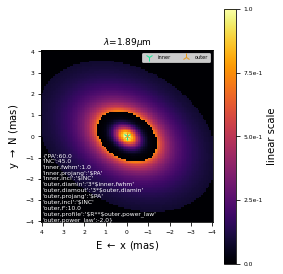

In [5]:
model = {'PA':60, 
         'INC':45,
         'inner,fwhm':1, 
         'inner,projang':'$PA', 
         'inner,incl':'$INC',
         'outer,diamin':'3*$inner,fwhm', 
         'outer,diamout':'3*$outer,diamin', 
         'outer,projang':'$PA', 
         'outer,incl':'$INC', 
         'outer,f':10, 
         'outer,profile':'$R**$outer,power_law', 
         'outer,power_law':-2}
oi.showModel(model, WL=WL, imFov=8, showSED=False)
plt.text(4, -4, '{'+'\n'.join(["'%s':'%s'"%(k, model[k].replace('$', '\$')) if type(model[k])==str else "'%s':%.1f"%(k, model[k]) for k in model])+'}', 
         color='w', in_layout=True, fontsize=6, ha='left')

{'Din': 1,
 'Dout': 7,
 'INCL': 45,
 'PROJANG': 60,
 'pitch': 60,
 'PAin': -45,
 'ring0,diamin': '$Din + 0/8*($Dout-$Din)',
 'ring0,diamout': '$Din + 1/8*($Dout-$Din)',
 'ring0,az amp1': 1,
 'ring0,az projang1': '$PAin + $pitch*$ring0,diamin',
 'ring0,incl': '$INCL',
 'ring0,projang': '$PROJANG',
 'ring1,diamin': '$Din + 1/8*($Dout-$Din)',
 'ring1,diamout': '$Din + 2/8*($Dout-$Din)',
 'ring1,az amp1': 1,
 'ring1,az projang1': '$PAin + $pitch*$ring1,diamin',
 'ring1,incl': '$INCL',
 'ring1,projang': '$PROJANG',
 'ring2,diamin': '$Din + 2/8*($Dout-$Din)',
 'ring2,diamout': '$Din + 3/8*($Dout-$Din)',
 'ring2,az amp1': 1,
 'ring2,az projang1': '$PAin + $pitch*$ring2,diamin',
 'ring2,incl': '$INCL',
 'ring2,projang': '$PROJANG',
 'ring3,diamin': '$Din + 3/8*($Dout-$Din)',
 'ring3,diamout': '$Din + 4/8*($Dout-$Din)',
 'ring3,az amp1': 1,
 'ring3,az projang1': '$PAin + $pitch*$ring3,diamin',
 'ring3,incl': '$INCL',
 'ring3,projang': '$PROJANG',
 'ring4,diamin': '$Din + 4/8*($Dout-$Din)',
 'ri

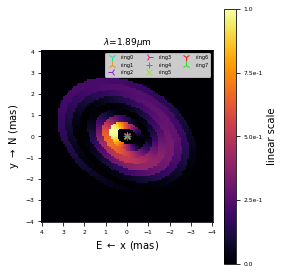

In [6]:
N = 8
model = {'Din':1, 'Dout':7, 'INCL':45, 'PROJANG':60, 'pitch':60, 'PAin':-45}
for i in range(N):
    k = 'ring'+str(i)+','
    model.update({k+'diamin': '$Din + %d/%d*($Dout-$Din)'%(i, N),
              k+'diamout': '$Din + %d/%d*($Dout-$Din)'%(i+1, N),
              k+'az amp1':1, k+'az projang1':'$PAin + $pitch*$%sdiamin'%k,               
              k+'incl':'$INCL', k+'projang':'$PROJANG', 
             })
display(model)
oi.showModel(model, WL=WL, imFov=8, showSED=False)

## Spectral lines

spectral lines can be defined as gaussians or lorentzian. A given component can have as many lines as needed. The line parameters starts with `line_` followed by a user defined name of the line (`x` below), followed by the parameter's name, starting with `_`. 
- `line_x_wl0`: central wavelength in microns
- `line_x_lorentzian` or `line_x_gaussian`: full width at half maximum, in nanometers
- `line_x_f`: amplitude of the line. Positive for an emission line, negative for an absorption line.

The line(s) will add up to the other flux definition. Remember that if no `f` or `spectrum` is defined, the flux will be set to `{'f':1}` by default. 

Text(4, -4, "{'1,fwhm':2.0\n'1,f':0.8\n'1,line_Brg_wl0':2.2\n'1,line_Brg_gaussian':1.0\n'1,line_Brg_f':0.5\n'2,ud':1.0\n'2,f':0.2\n'2,line_Brg_wl0':2.2\n'2,line_Brg_lorentzian':3.0\n'2,line_Brg_f':-0.1\n'2,x':2.0\n'2,y':3.0}")

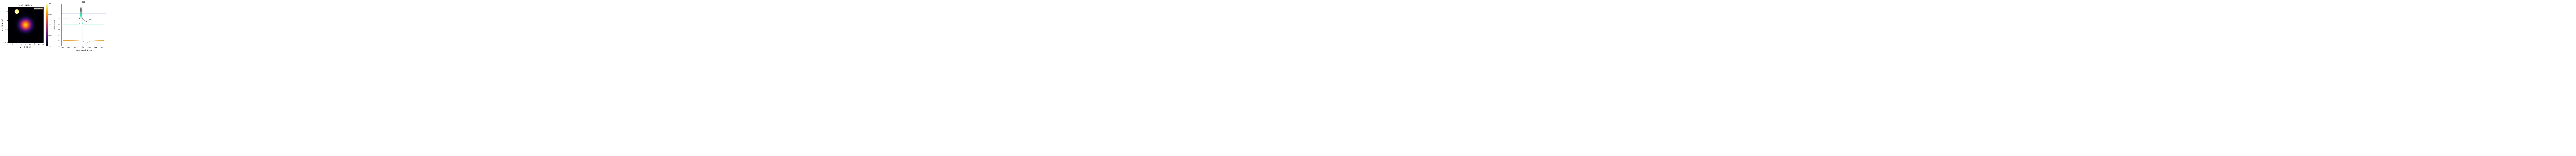

In [7]:
model = {'1,fwhm':2, 
         '1,f':0.8, 
         '1,line_Brg_wl0':2.164, 
         '1,line_Brg_gaussian':1, 
         '1,line_Brg_f':0.5,
         '2,ud':1, 
         '2,f':0.2,
         '2,line_Brg_wl0':2.168, 
         '2,line_Brg_lorentzian':3, 
         '2,line_Brg_f':-0.1,
         '2,x':2, '2,y':3,
        }

# -- wavelength vector (in um)
WLk = np.linspace(2.166-0.015, 2.166+0.015, 100)

oi.showModel(model, WL=WLk, imFov=8, showSED=True, imMax='99')
plt.text(4, -4, '{'+'\n'.join(["'%s':'%s'"%(k, model[k].replace('$', '\$')) if type(model[k])==str else "'%s':%.1f"%(k, model[k]) for k in model])+'}', 
         color='w', in_layout=True, fontsize=6, ha='left')


## simulating VLTI observations from model

The `PMOIRED` submodule `oifake` allows to generate simulated VLTI data, providing a telescope configuration (using a list of stations), a set of coordinates `(RA.h, DEC.d)`, a list of LST observations times (in hours), and a list of wavelength (in microns).

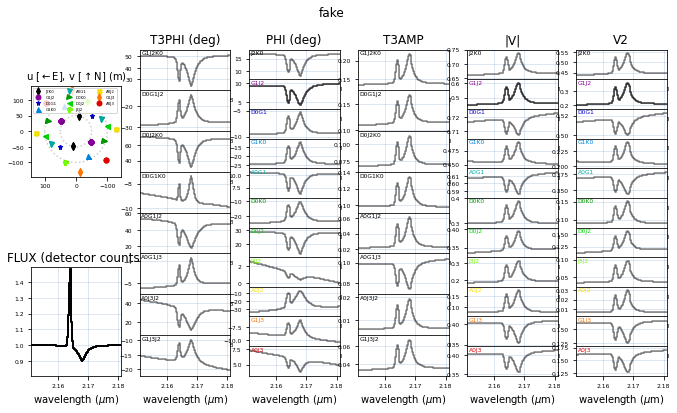

In [8]:
model = {'1,fwhm':2, 
         '1,f':0.8, 
         '1,line_Brg_wl0':2.164, 
         '1,line_Brg_gaussian':1, 
         '1,line_Brg_f':0.5,
         '2,ud':1, 
         '2,f':0.2,
         '2,line_Brg_wl0':2.168, 
         '2,line_Brg_lorentzian':3, 
         '2,line_Brg_f':-0.1,
         '2,x':2, '2,y':3,
        }

# -- wavelength vector to simulate data (in um)
WLk = np.linspace(2.166-0.015, 2.166+0.015, 100)
# -- list of sidereal time of observations (hours): must be a list or np.ndarray
lst = [0] 
# -- create empty OI object
oi = pmoired.OI()
oi.fig=100
# -- note that oi.data must be a list! 
oi.data = [pmoired.oifake.makeFakeVLTI(['A0','G1','J3','J2'], (0, -32), lst, WLk, model=model),
           pmoired.oifake.makeFakeVLTI(['D0','G1','J2','K0'], (0, -32), lst, WLk, model=model)]
oi.show()